# Instagram Reach Analysis and prediction

## Importing required libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

Data cleaning: 
1. checking for null values

In [14]:
data.isnull().sum()
#for dropping null values:data = data.dropna()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Here we can observe that there are no null values, hence moving on to the next steps

In [15]:
#checking the data present:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


There are no missing values here

Since there are no unnnecessary values, we are proceeding further with analysis.
Else will proceed with data cleaning(removing unwanted column, dealing with missing values and changing the data type as neccessary)

## Exploratory data Analysis

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


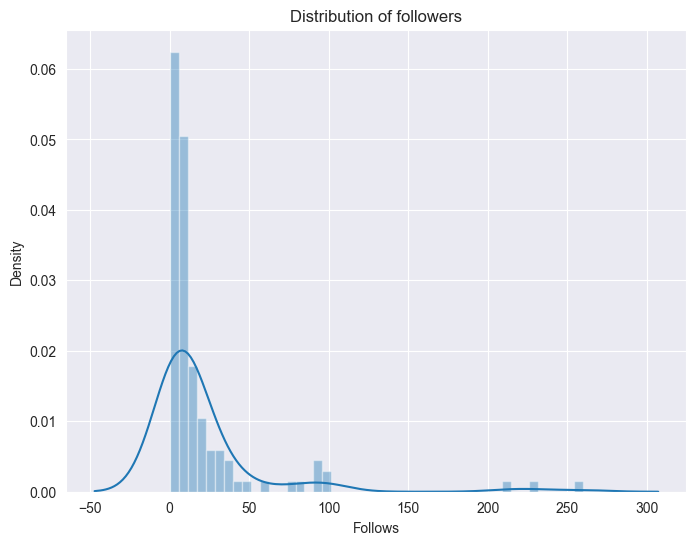

In [19]:
plt.figure(figsize=(8, 6))
sns.distplot(data['Follows'])
plt.title("Distribution of followers")
plt.show()

From this, we can infer that it is right skewed

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


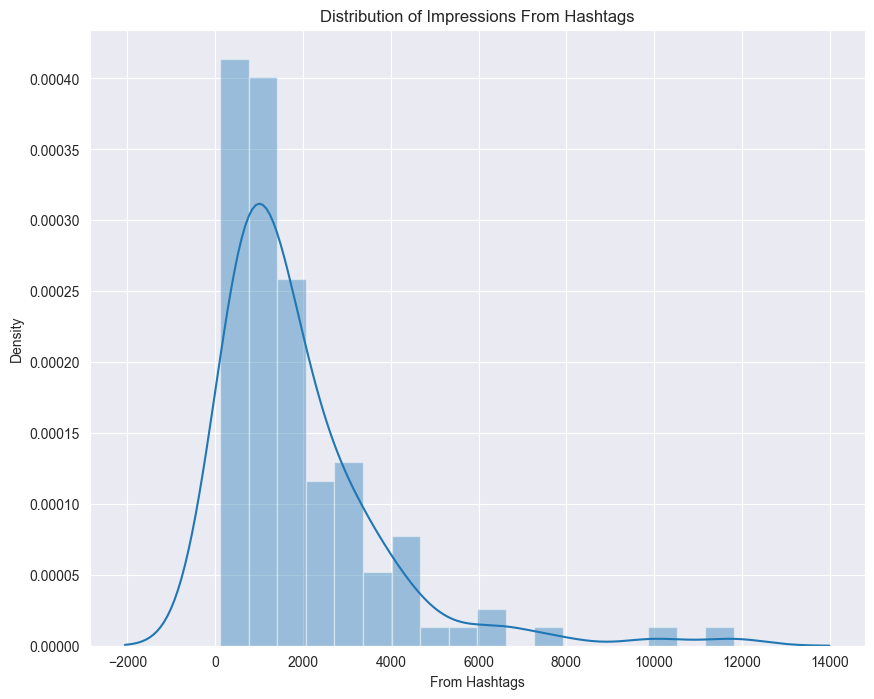

In [20]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

The hashtag distribution is also right skewed. From here we can observe that all posts cannot be reached using hashtags.

let's see how many are new users that are reached and the total number of visits.

In [26]:
#finding unique user names
print('There are', data['Profile Visits'].nunique(), 'Profile Visits')
print('There are', data['Profile Visits'].sum(), 'Profile Visits')

There are 59 Profile Visits
There are 6024 Profile Visits


checking the impressions on the instagram account

In [29]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

From the graph, majority of the impact for the account is from home page(followers) and hashtags/ The rest is from explore and other sources

Using wordcloud, checking the mostly used words (P.S. wanted to try this:P)

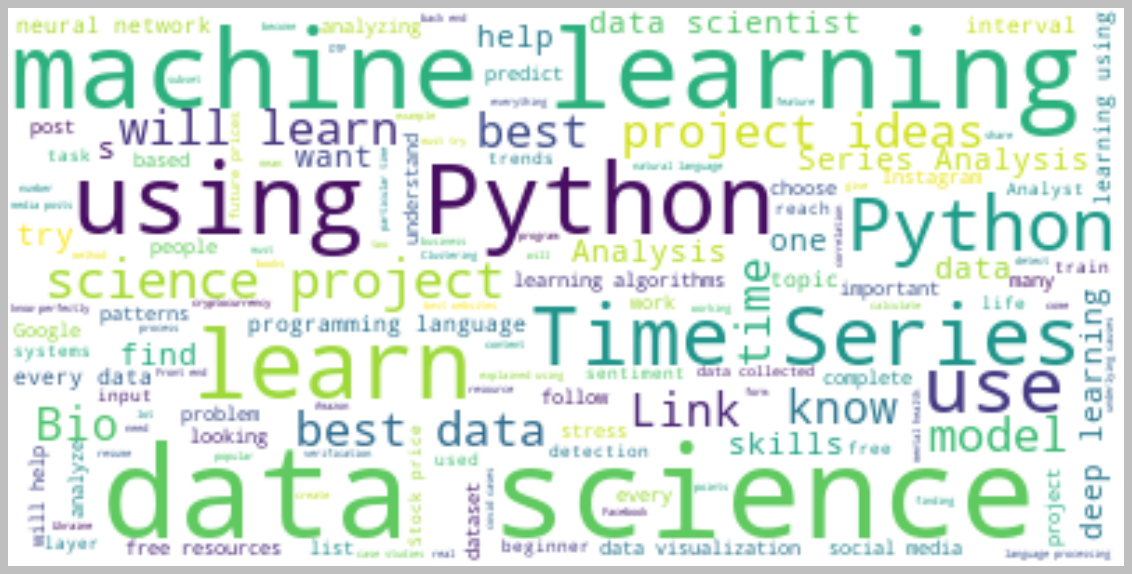

In [28]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

from the above wordcloud, the top words in caption are 'Machine learning', 'using python','data science'

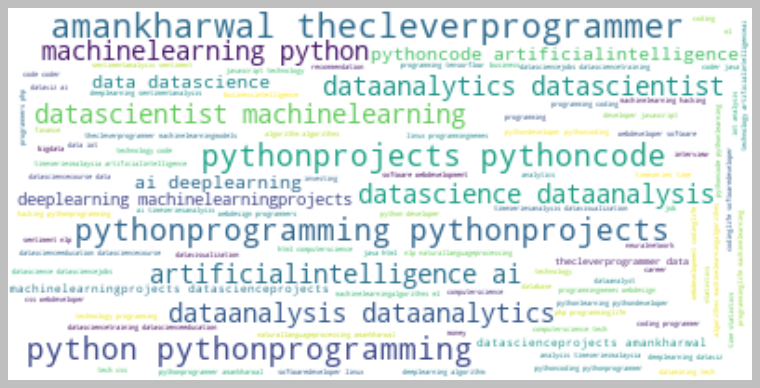

In [31]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

from the above wordcloud, the top words in caption are 'pythomprogramming', 'pythonprojects','amankharwal tecleverprogrammer'

## Relationship between two variables 

impressions and likes
Using scatterplot to visualize the linear relationship between these variables

In [34]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Total Impressions")
figure.show()

followers and likes

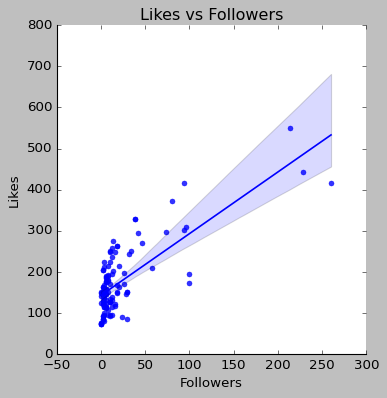

In [40]:
sns.lmplot(x='Follows', y='Likes', data = data, fit_reg=True)

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

lets, check if there is any correlation using heatmap

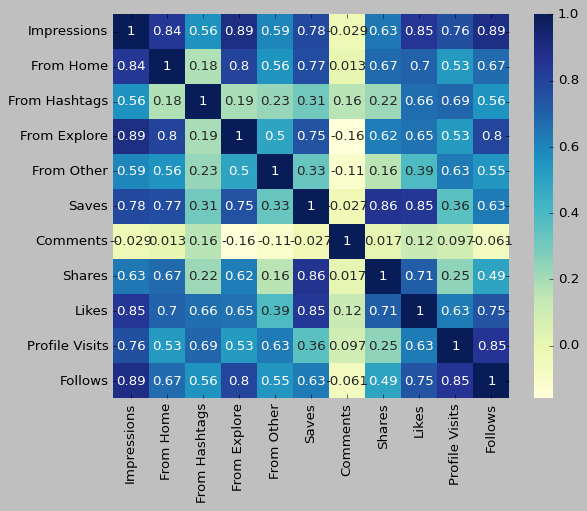

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

There is a strong correlation between follows and impressions--followed by profile visits  and follows/saves and shares

Lets verify the values here

In [48]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


## Modelling

In [49]:

x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [58]:
#Predicting reach with XGBRegressor
#importing required modules
from sklearn.model_selection import RepeatedKFold

In [62]:
from xgboost import XGBRegressor

In [63]:
#Fit the model and predict the value of test set
model = XGBRegressor()
model.fit(xtrain, ytrain)

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluate the model
scores = cross_val_score(model, xtest, ytest, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#Absolute MAE (mean absolute error)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

<IPython.core.display.Javascript object>

Mean MAE: 2107.110 (2405.766)


In [67]:
model.score(xtest, ytest)

0.954075086343203

In [71]:
#Predict new value using XGBoost
X_new = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(X_new)

array([10236.512], dtype=float32)

In [72]:
#predicting using passiveagrressiveregressor

model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8898341601122328

In [73]:
#predicting using features of ML model:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10985.411947])